# Welcome to the AMIDR/AMID Analysis Notebook!

This notebook allows easy analysis of AMIDR/AMID data (from Dal and Novonix UHPC files or BioLogic files converted into UHPC format) with flexibility for naming files and creating directories.

The text preceeding each cell gives some information on the arguments that can be supplied to the function calls.

To run a block press "shift+enter". All blocks with text, like this one, can be run or skipped over.

The next block is used to load up the AMIDR/AMID program.

In [1]:
from amidr import AMIDR

### BioLogic Pre-processing (Ignore if UHPC)

Exported BioLogic files must first be pre-processed to generate UHPC format files capable of being read by AMIDR. Please ignore this section if testing was done using Dal or Novonix UHPC cell testers. Check the second plot to ensure that there is strong OCV agreement between charge and discharge. Poor agreement suggests substantial side reactions which will introduce error to the measured diffusivity values. 

>**path**: The location on your computer where the BioLogic files are located and where the UHPC format files will be placed. It is recommended to dedicate this folder to a single cell and use this same path in further analysis. This will allow you to never have to manually move files. Use the "/", not the "\\", for separating directories.

>**form_files/d_files/c_files**: The names of the formation, discharge, and charge BioLogic files. Be sure to list them in chronological order and include the .mpt file extension.

>**cellname**: The name of the cell being measured. It's recommended to include information such as material and temperature.

>**export_fig**: Whether or not to save the resulting figures. All figures get saved in the directory *path*. <br> *Default is True*

586       0.000577
587       0.000577
687       0.000577
787       0.000577
887       0.000577
            ...   
124520    0.000173
124521    0.000173
124522    0.000173
124523    0.000173
124524    0.000173
Name: Capacity (Ah), Length: 46121, dtype: float64
586       0.000577
587       0.000577
687       0.000577
787       0.000577
887       0.000577
            ...   
124520    0.000173
124521    0.000173
124522    0.000173
124523    0.000173
124524    0.000173
Name: Capacity (Ah), Length: 46121, dtype: float64


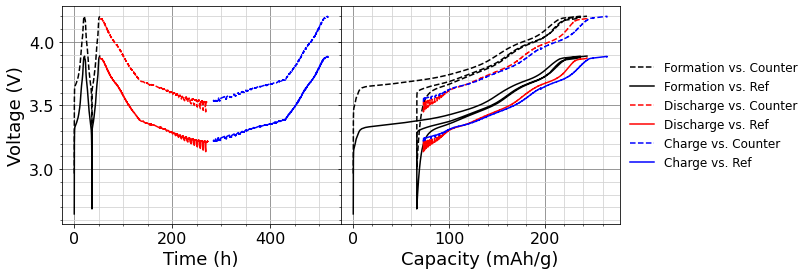

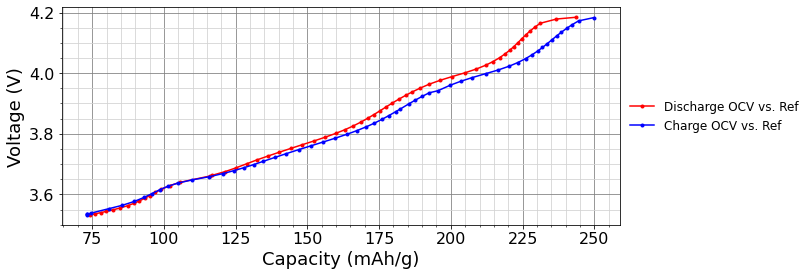

In [8]:
from amidr import BIOCONVERT

path = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/269'
form_files = ['269_230530_C12.mpt']
d_files = ['269_230602_D4,2-3,95V_C12.mpt', '269_230604_D3,95-3,7V_C12.mpt', '269_230606_D3,7-3,45V_C12.mpt']
c_files = ['269_230612_C3,5-3,7V_C12.mpt', '269_230619_C3,7-3,95V_C12.mpt', '269_230623_C3,95-4,2V_C12.mpt']
cellname = '269 NM9505 30C'

BIOCONVERT(path, form_files, d_files, c_files, cellname)

### The AMIDR/AMID Object

Instantiating the AMIDR/AMID object is easy! The resulting object (in this case **amidr_data**) will contain parsed data from the AMIDR/AMID dataset. You should read the output to be sure it is giving the information you expect.

>**path**: The location on your computer where the UHPC format AMIDR/AMID file is located and where the analysis files will be placed. It is recommended to dedicate this folder to a single cell. Use the "/", not the "\\", for separating directories.

>**uhpc_file**: The name of the AMIDR/AMID UHPC file to analyze. If BioLogic pre-processing was done, this is the charge or discharge file that was outputted by that. Be sure to include the .csv extension. All analysis of this file will be labeled with this file name and sent into a subfolder of this file name. It is recommended that the file name end with "Discharge.csv" or "Charge.csv" if it is desired to average the resulting analysis with other analyses of cells of the same material. If BioLogic pre-processing was done this has already been done automatically.

>**single_pulse**: Whether the data file being read comes from an AMIDR *(True)* or AMID *(False)* protocol. Parsing will fail if not selected correctly.

> **export_data**: Whether or not to the parsed data as a series of datatables. The datatables file gets saved in the directory *path\\uhpc_file*.<br> *Default is True*

#### [Optional Arguments (Advanced)](#The-AMIDR/AMID-Object-Optional-Arguments:)

In [9]:
path = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/269'
uhpc_file = '269 NM9505 30C Charge.csv'
amidr_data = AMIDR(path, uhpc_file, single_pulse=True)

Working on cell: 269 NM9505 30C
Positive electrode active mass: 0.002367 g
Input cell capacity: 0.000533 Ah
3-electrode data detected. Using working potential for calculations and complete potential for graphs and labels.
First signature curve step: 1
Last signature curve step: 171
Specific Capacity achieved in advanced protocol (signature curves): 191.28 mAh/g
Using 0.00053300 Ah to compute rates.
Starting voltage: 3.534 V
Ending voltage: 4.199 V
Found 57 charge or discharge steps in signature curve sequences.
Found 57 signature curves.
Voltage interval labels: ['3.534 V - 3.534 V', '3.534 V - 3.534 V', '3.534 V - 3.538 V', '3.538 V - 3.553 V', '3.553 V - 3.564 V', '3.564 V - 3.577 V', '3.577 V - 3.590 V', '3.590 V - 3.603 V', '3.603 V - 3.615 V', '3.615 V - 3.627 V', '3.627 V - 3.637 V', '3.637 V - 3.648 V', '3.648 V - 3.658 V', '3.658 V - 3.669 V', '3.669 V - 3.679 V', '3.679 V - 3.689 V', '3.689 V - 3.699 V', '3.699 V - 3.709 V', '3.709 V - 3.722 V', '3.722 V - 3.735 V', '3.735 V -

### Pre-fitting Plots

Now that the data is parsed and evaluated the standard plots can be produced. plot_protocol plots the entire protocol being analyzed. plot_caps plots pulses/intervals individually. The plots should be examined to ensure your test data is being parsed and evaluated correctly.

>**export_fig**: Whether or not to save the resulting figure. All figures get saved in the directory *path\\uhpc_file*. <br> *Default is True*

>**ylims**: Optional input to fix y-axis plot bounds. A list with the min and max values for the y-axis bounds. <br> *e.g., ylims=[2.95, 4.35]* <br> *Default is []*

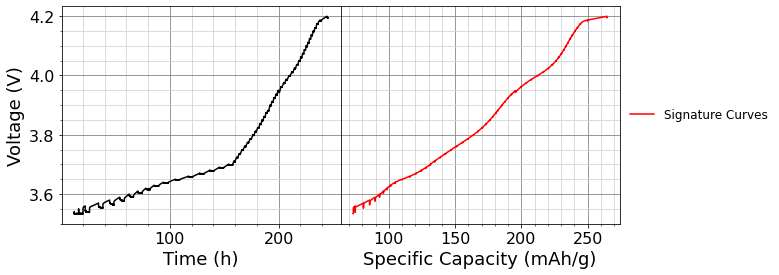

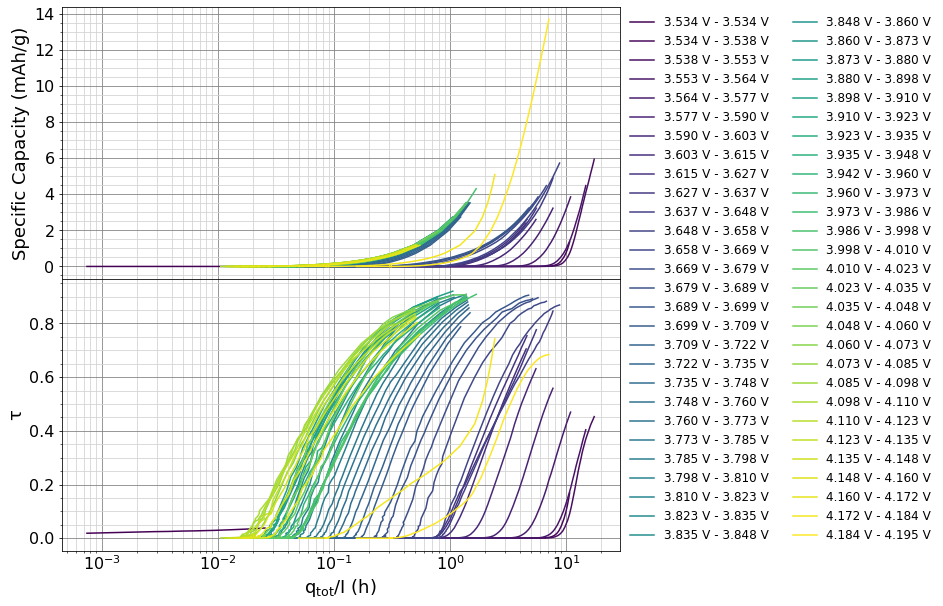

In [10]:
amidr_data.plot_protocol()
amidr_data.plot_caps()

### Data Fitting 
If your data has been correctly parsed, it is now time to fit it to calculate diffusivity (and potentially resistance). Take care when selecting your arguments as this step can take some time.

> **radius**: The particle radius in cm. It is recommended to calculate this by measuring individual particles in SEM images and then take the mass-weighted geometric mean.

> **R_corr**: Whether the data is being fit to an AMIDR *(True)* or AMID *(False)* model. AMIDR's model includes resistance as a source of impedance and will return both diffusivity and resistance values. AMID data can be fit to the AMIDR model, but this is not recommended as this will amplify systematic error in AMID's multi-rate protocol. AMIDR data can also be fit to AMID's model but this is not recommended as this allows resistance to be falsely measured as diffusivity.

> **tracer_inputs**: A list of optional inputs to calculate D<sub>t</sub>\*. If left empty, D<sub>t</sub>\* will simply not be calculated. The three inputs are: <br> 
\- The theoretical max capacity of a completely saturated and desaturated active material in mAh/g <br> 
\- An estimate of the true starting capacity of the signature curves being measured in mAh/g <br> 
\- The temperature in K <br>
Ideally, the starting capacity of the signature curves is simply the capacity measured at the beginning of the signature curves. However, side reactions such as electrolyte interface formation or electrolyte shuttling may shift the measured starting capacity away from the true starting capacity. Therefore, the offset in capacity between the signature curves and their corresponding formation half cycle should be considered. This offset can be observed in previously produced figures. The true starting capacity of the signature curves is best estimated by subtracting an estimate of the offset from the the measured starting capacity. A large error in the capacity values selected will only contribute to a very small error in the calculated D<sub>t</sub>\* unless if pulses are applied to active material near a completely saturated or desaturated state. <br> *e.g., tracer_inputs = \[275, 230, 303.15\]* <br> *Default is \[\]*

> **micR_input**: The density of the active material in g/cm^3. This is necessary to calculate the interface contact resistivity (Ωcm^2). This value is normalized by the surface area of the active material so that it is inherent to the material and not dependent on the mass loading. If it is believed that the primary source of the resistance is the interface resistance, this value will be calculated accurately. Regardless, it is expressed as the "maximum" interface contact resistivity because a portion of it, no matter how small, will be from other sources. Error in the active mass and density values will contribute a proportional error in the calculated interface contact resistivity. However, because interface contact resistivity often changes drastically on a logarithmic scale, this error can be mostly ignored. <br> *Default is 4.9*

> **export_fig**: Whether or not to save figures comparing theory to fitted values for each pulse/interval. Unlike past functions, these figures will not be previewed in this notebook because too many figures would be shown. All figures get saved in the directory *path\\uhpc_file*. <br> *Default is True*

> **export_data**: Whether or not to save D<sub>c</sub> and other values of merit as a datatable. All datatables get saved in the directory *path\\uhpc_file*.<br> *Default is True*

> **label**: An additional label to append to the cell_label on the figures and exported file names. This can be helpful for comparing different fitting settings upon the same dataset. Changing the label allows for the fitting to generate files to same directory without overwriting the last fitting. <br> *Default is None*

#### [Optional Arguments (Advanced)](#Data-Fitting-Optional-Arguments:)

In [11]:
radius = 1.461e-4 #Zhenhua NM9505
#radius = 0.784e-4 #NMC640
#radius = 1.736e-4 #NMC811
label = None
fit_data = amidr_data.fit_atlung(radius, R_corr=True, tracer_inputs = [275.5, 60, 303.15], label=label)

Optimum Parameters: Log(Dc) Log(Reff) Log(Reff/Dc)
3.534 V - 3.534 V: [  5.21  -6.   -11.21]
3.534 V - 3.538 V: [ 12.074  -0.83  -12.904]
3.538 V - 3.553 V: [ 12.146  -0.369 -12.515]
3.553 V - 3.564 V: [ 12.039  -0.804 -12.842]
3.564 V - 3.577 V: [ 11.783  -1.019 -12.803]
3.577 V - 3.590 V: [ 11.555  -1.003 -12.558]
3.590 V - 3.603 V: [ 11.335  -1.008 -12.343]
3.603 V - 3.615 V: [ 11.134  -1.073 -12.207]
3.615 V - 3.627 V: [ 11.062  -1.085 -12.147]
3.627 V - 3.637 V: [ 11.042  -1.196 -12.238]
3.637 V - 3.648 V: [ 11.092  -1.127 -12.219]
3.648 V - 3.658 V: [ 11.07  -0.89 -11.96]
3.658 V - 3.669 V: [ 10.875  -0.775 -11.65 ]
3.669 V - 3.679 V: [ 10.736  -0.789 -11.525]
3.679 V - 3.689 V: [ 10.611  -0.859 -11.47 ]
3.689 V - 3.699 V: [ 10.541  -0.868 -11.409]
3.699 V - 3.709 V: [ 10.425  -0.848 -11.273]
3.709 V - 3.722 V: [ 10.357  -0.886 -11.242]
3.722 V - 3.735 V: [ 10.276  -0.909 -11.185]
3.735 V - 3.748 V: [ 10.202  -0.932 -11.134]
3.748 V - 3.760 V: [ 10.141  -0.955 -11.096]
3.760 V - 

### Summary Graph

Check the summary graph of your fits to visualize results quickly and to ensure your data was fit correctly.

> **fit_data**: The results of the data fitting that must be passed to this function.

> **export_fig**: Whether or not to save the resulting figure. The figure gets save in the directory *path\\uhpc_file*.<br> *Default is True*

> **label**: An additional label to append to the cell_label for the exported file names. It is strongly recommended to use the same label given for the data fitting. <br> *Default is None*

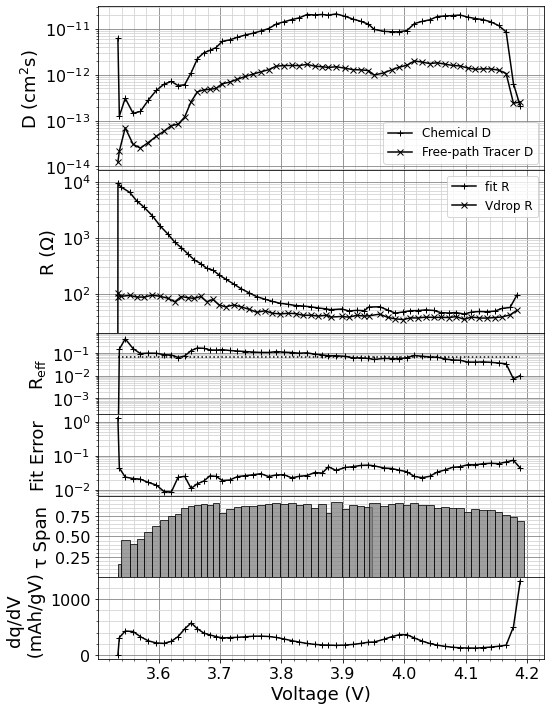

In [14]:
amidr_data.make_summary_graph(fit_data=fit_data, label=label)

### Bin Averaging
Multiple different fittings of different cells with the same material can be compared and averaged together. Because the independent values of the fittings, voltage, is inconsistent cell to cell, averaging is done by binning values of a certain voltage range together. Not recommended for AMID as the voltages are predefined.

In [65]:
from amidr import BINAVERAGE

cellpaths = ['C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data/269']
matpath = 'C:/Users/Mitch/Lab/Atlung Modeling/BioLogic Data'
matname = 'NM9505'

BINAVERAGE(cellpaths, matpath, matname, binsize = 0.025)

Found charge data for cell 269
Found discharge data for cell 269


#### The AMIDR/AMID Object (Optional Arguments):

>**use_input_cap**: Whether to use the capacity on the file label or to use the total capacity elapsed in the file to calculate rates for labelling. This only impacts pre-fitting outputs and is irrelevant for calculating Diffusivity and Resistance. <br> *Default is True*

>**spliced**: Whether to properly read step numbers for AMID files that have been manually spliced together due to the test having to be restarted on account of power failure or other reasons. Not available for AMIDR. <br> *Default is False*

>**fcap_min**: A fractional value for the lower limit of fcap (τ) allowed to be considered in curve fitting. Adjusting this may assist with fitting when double layer capacitance is a large part of the total capacity for some pulses/intervals, but is not recommended. If adjusting this, it is recommended to use a different cell_label. <br> *Default is 0.0*

>**capacitance_corr**: Whether to enable additional processing to neglect the capacity of the double layer capacitance when calculating fcap (τ). Ohmic resistance and double layer are estimated from the lowest voltage pulse (only available for AMIDR). Enabling this may assist with fitting when double layer capacitance is a large part of the total capacity for some pulses/intervals, but the correction is imperfect and is not recommended. If enabling this, it is recommended to use a different cell_label. <br> *Default is False*

>**force2e**: Whether or not to include counter electrode impedance and force a 3 electrode cell to be analyzed as if it was 2 electrodes. This is ignored if no 3 electrode data is detected. If enabling this, it is recommended to use a different cell_label. <br> *Default is False*

#### Data Fitting (Optional Arguments):

> **D_bounds**: Bounds for D<sub>c</sub>. Results can be somewhat outside these bounds if using AMIDR analysis as technically R<sub>eff</sub> and R<sub>eff</sub>/D<sub>c</sub> are being fit to improve fitting accuracy. <br> *Default is \[1.0e-17, 1.0e-8\]*

> **D_guess**: Initial guess for D<sub>c</sub>. <br> *Default is 1.0e-13*

> **fcapadj_bounds**: Bounds for the adjustment to the total capacity of an interval for AMID protocol datasets. The cumulative capacity achieved by the final low current pulse used for calculating fcap (τ) is slightly less than the theoretical total capacity. Therefore some positive adjustment is allowed. This is irrelevant for AMIDR analysis. <br> *Default is \[1.0, 1.5\]*

> **fcapadj_guess**: Initial guess for the adjustment to the total capacity of an interval for AMID protocol datasets. This is irrelevant for AMIDR analysis. <br> *Default is 1.0*

> **R_eff_bounds**: Bounds for R<sub>eff</sub>. This is irrelevant for AMID analysis. <br> *Default is \[1.0e-6, 1.0e1\]*

> **R_eff_guess**: Initial guess for D<sub>c</sub>. This is irrelevant for AMID analysis. <br> *Default is 1.0e-2*

> **shape**: Particle geometry being modeled. Currently supports "sphere" and "plane". <br> *Default is "sphere".*

> **nalpha**: The number of expansion coefficients to use in the Atlung expression. <br> *Default is 4000.*

> **nQ** : The number of Q values (on a log scale) to use in the black Atlung model curve for comparing fit quality. <br> *Default is 4000.*